In [19]:
import pandas as pd

,group,instructor,quiz_average,Exam_1,Total,Grade
0,1,B,5.0,76,101.0,71.6710
1,1,B,5.0,77,102.0,72.5045
2,1,B,2.5,0,12.5,4.1625
3,1,B,5.7,92,120.5,86.1725
4,1,B,9.5,87,134.5,88.3320
...,...,...,...,...,...,...
288,13,C,4.6,33,56.0,35.1645
289,13,C,6.0,54,84.0,54.9990
290,13,C,3.0,33,48.0,32.5005
291,13,C,9.0,96,141.0,95.0010


In [80]:
data = pd.read_csv("~/Desktop/flashcard_/python files/Students_quizzes.csv")
data = data[data.Exam_1 != 0]
data

,group,instructor,quiz_average,Exam_1,Total,Grade
0,1,B,5.0,76,101.0,71.6710
1,1,B,5.0,77,102.0,72.5045
3,1,B,5.7,92,120.5,86.1725
4,1,B,9.5,87,134.5,88.3320
5,1,B,4.6,58,81.0,56.0020
...,...,...,...,...,...,...
288,13,C,4.6,33,56.0,35.1645
289,13,C,6.0,54,84.0,54.9990
290,13,C,3.0,33,48.0,32.5005
291,13,C,9.0,96,141.0,95.0010


# EDA

In [104]:
print(data.describe())
print(data.groupby('instructor')[["Exam_1"]].describe().unstack(1))
print(data.groupby('instructor')[["Exam_1"]].std().unstack(1))

            group  quiz_average      Exam_1       Total       Grade
count  281.000000    281.000000  281.000000  281.000000  281.000000
mean     7.209964      5.988968   74.227758  104.172598   71.892981
std      3.667722      2.359612   22.395585   30.204061   20.999297
min      1.000000      0.400000   10.000000   32.000000   17.495500
25%      4.000000      4.200000   59.000000   83.000000   57.173500
50%      7.000000      5.800000   78.000000  110.000000   76.341000
75%     10.000000      7.800000   93.000000  128.000000   89.332000
max     13.000000     10.000000  105.000000  155.000000  104.167500
               instructor
Exam_1  count  A              65.000000
               B              59.000000
               C              90.000000
               D              67.000000
        mean   A              75.276923
               B              65.966102
               C              77.300000
               D              76.358209
        std    A              21.529419
  

In [103]:
data["group"].value_counts()
data["instructor"].value_counts()
print(data[["instructor","quiz_average"]].groupby("instructor").mean())
print(data[["instructor", "Exam_1"]].groupby("instructor").mean())
data[["instructor","Exam_1"]].groupby("instructor").max() - data[["instructor","Exam_1"]].groupby("instructor").min() 


            quiz_average
instructor              
A               3.993846
B               5.216949
C               8.086667
D               5.786567
               Exam_1
instructor           
A           75.276923
B           65.966102
C           77.300000
D           76.358209


,Exam_1
instructor,
A,77
B,88
C,95
D,90


instructor
A    AxesSubplot(0.125,0.125;0.775x0.755)
B    AxesSubplot(0.125,0.125;0.775x0.755)
C    AxesSubplot(0.125,0.125;0.775x0.755)
D    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

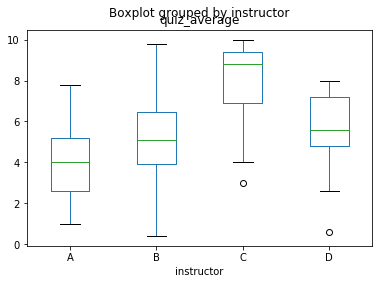

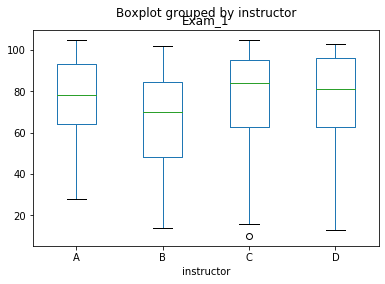

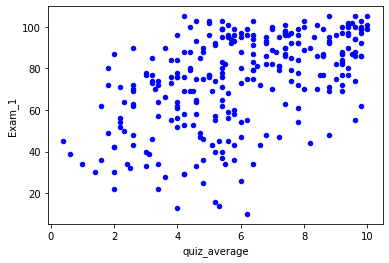

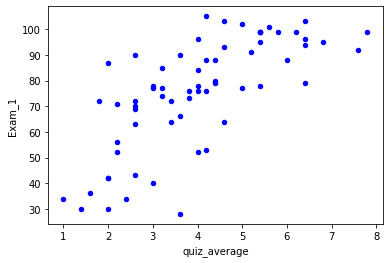

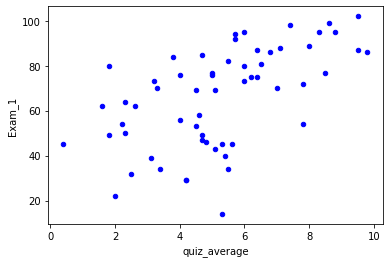

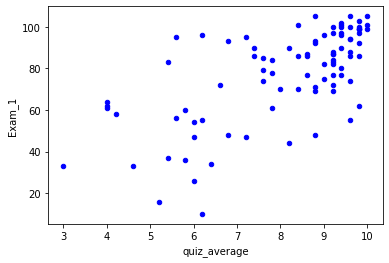

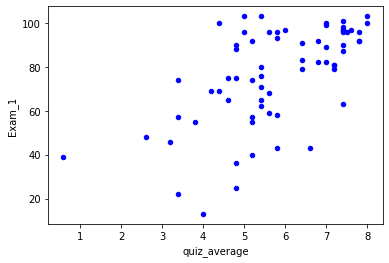

In [107]:
data.boxplot(column="quiz_average", by="instructor", grid=False)
data.boxplot(column="Exam_1", by="instructor", grid=False)
import matplotlib.pyplot as plt
data.plot.scatter(x="quiz_average", y="Exam_1", c="blue")
data.groupby("instructor").plot.scatter(x="quiz_average", y="Exam_1", c="blue")

# Analysis

In [106]:
print(data[["quiz_average","Exam_1"]].corr(method="pearson"))
data.groupby("instructor")[["quiz_average","Exam_1"]].corr(method="pearson")

              quiz_average    Exam_1
quiz_average      1.000000  0.513822
Exam_1            0.513822  1.000000


quiz_average    Exam_1
instructor                                     
A          quiz_average      1.000000  0.711916
           Exam_1            0.711916  1.000000
B          quiz_average      1.000000  0.568907
           Exam_1            0.568907  1.000000
C          quiz_average      1.000000  0.658733
           Exam_1            0.658733  1.000000
D          quiz_average      1.000000  0.609444
           Exam_1            0.609444  1.000000

# ANOVA (quizzes)

In [117]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import statsmodels.api as sm
from statsmodels.formula.api import ols
ols_model = ols('quiz_average ~ instructor', data=data).fit()
print(sm.stats.anova_lm(ols_model,typ=2))
ols_model.params

                sum_sq     df         F        PR(>F)
instructor  692.673301    3.0  73.82737  4.065494e-35
Residual    866.302500  277.0       NaN           NaN


Intercept          3.993846
instructor[T.B]    1.223103
instructor[T.C]    4.092821
instructor[T.D]    1.792721
dtype: float64

# Assumptions

### Shapiro - Wilks test for normality

In [112]:
import scipy.stats as stats
w, pvalue = stats.shapiro(ols_model.resid)
print(w, pvalue)

0.985715925693512 0.006782087031751871


### Levene test for homogeneity of variances

In [113]:
import scipy.stats as stats
w, pvalue = stats.levene(data['quiz_average'],data["Exam_1"])
print(w, pvalue)

377.77190127055013 1.0699783958941828e-64


# Post hoc test

In [114]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

In [115]:
mc_test = multi.MultiComparison(data['quiz_average'], data['instructor'])
result = mc_test.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   1.2231  0.001  0.4011  2.0451   True
     A      C   4.0928  0.001  3.3488  4.8369   True
     A      D   1.7927  0.001  0.9969  2.5885   True
     B      C   2.8697  0.001   2.104  3.6354   True
     B      D   0.5696 0.2737 -0.2465  1.3857  False
     C      D  -2.3001  0.001 -3.0377 -1.5625   True
----------------------------------------------------


# ANOVA (exams)

In [118]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import statsmodels.api as sm
from statsmodels.formula.api import ols
ols_model_2 = ols('Exam_1 ~ instructor', data=data).fit()
print(sm.stats.anova_lm(ols_model_2,typ=2))
ols_model_2.params

                   sum_sq     df         F    PR(>F)
instructor    5252.172914    3.0  3.587304  0.014247
Residual    135185.250573  277.0       NaN       NaN


Intercept          75.276923
instructor[T.B]    -9.310821
instructor[T.C]     2.023077
instructor[T.D]     1.081286
dtype: float64

# Post hoc test

In [119]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

In [120]:
mc_test_2 = multi.MultiComparison(data['Exam_1'], data['instructor'])
result_2 = mc_test_2.tukeyhsd()
print(result_2)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  -9.3108 0.0907 -19.5787   0.957  False
     A      C   2.0231    0.9  -7.2717 11.3179  False
     A      D   1.0813    0.9    -8.86 11.0226  False
     B      C  11.3339 0.0128   1.7686 20.8992   True
     B      D  10.3921 0.0438   0.1974 20.5868   True
     C      D  -0.9418    0.9 -10.1557  8.2721  False
-----------------------------------------------------
